In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [7]:
df = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/df.csv', encoding = 'utf-8')
lp_df = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/lp_df.csv', encoding = 'utf-8')
final_df = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/final_df.csv', encoding = 'utf-8')
lp22 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/living_pop2022.csv', encoding = 'utf-8')

In [8]:
bc1 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202201.csv', encoding = 'utf-8')
bc2 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202202.csv', encoding = 'utf-8')
bc3 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202203.csv', encoding = 'utf-8')
bc4 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202204.csv', encoding = 'utf-8')
bc5 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202205.csv', encoding = 'utf-8')
bc6 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202206.csv', encoding = 'utf-8')
bc7 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202207.csv', encoding = 'utf-8')
bc8 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202208.csv', encoding = 'utf-8')
bc9 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202209.csv', encoding = 'utf-8')
bc10 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202210.csv', encoding = 'utf-8')
bc11 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202211.csv', encoding = 'utf-8')
bc12 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/시군구_매출집계데이터_202212.csv', encoding = 'utf-8')

In [9]:
df.drop(df.iloc[:,:1], axis = 1, inplace = True)

In [10]:
lp_df = lp_df[lp_df['클러스터'] == 0]

In [11]:
lp_df = pd.merge(lp_df['행정구역'], lp22, how = 'inner', on = '행정구역')

In [12]:
target = ['고흥군', '진안군', '순창군', '임실군', '함평군']

In [13]:
final_df['생활환경지수'] = final_df['생활환경지수'] * 100
final_df['지역매력지수'] = final_df['생활환경지수'] + final_df['관광 활성화 지수']

In [14]:
df_l = final_df[final_df['생활환경지수'] > final_df['관광 활성화 지수']]
df_t = final_df[final_df['생활환경지수'] < final_df['관광 활성화 지수']]

In [15]:
lp_df_l = pd.merge(df_l, lp22, how = 'inner', on = '행정구역')
lp_df_t = pd.merge(df_t, lp22, how = 'inner', on = '행정구역')

In [16]:
bc = pd.concat([bc1,bc2,bc3,bc4,bc5,bc6,bc7,bc8,bc9,bc10,bc11,bc12], axis=1)

In [17]:
bc = bc[['dsbc_sigun_final_202201.시군구명',
           'dsbc_sigun_final_202201.bc대분류명',
           'dsbc_sigun_final_202201.추정매출금액',
           'dsbc_sigun_final_202202.추정매출금액',
           'dsbc_sigun_final_202203.추정매출금액',
           'dsbc_sigun_final_202204.추정매출금액',
           'dsbc_sigun_final_202205.추정매출금액',
           'dsbc_sigun_final_202206.추정매출금액',
           'dsbc_sigun_final_202207.추정매출금액',
           'dsbc_sigun_final_202208.추정매출금액',
           'dsbc_sigun_final_202209.추정매출금액',
           'dsbc_sigun_final_202210.추정매출금액',
           'dsbc_sigun_final_202211.추정매출금액',
           'dsbc_sigun_final_202212.추정매출금액',]]

In [18]:
bc.rename(columns = {'dsbc_sigun_final_202201.시군구명' : '행정구역',
                     'dsbc_sigun_final_202201.bc대분류명' : '대분류',
                     'dsbc_sigun_final_202201.추정매출금액' : '202201추정매출금액',
                     'dsbc_sigun_final_202202.추정매출금액' : '202202추정매출금액',
                     'dsbc_sigun_final_202203.추정매출금액' : '202203추정매출금액',
                     'dsbc_sigun_final_202204.추정매출금액' : '202204추정매출금액',
                     'dsbc_sigun_final_202205.추정매출금액' : '202205추정매출금액',
                     'dsbc_sigun_final_202206.추정매출금액' : '202206추정매출금액',
                     'dsbc_sigun_final_202207.추정매출금액' : '202207추정매출금액',
                     'dsbc_sigun_final_202208.추정매출금액' : '202208추정매출금액',
                     'dsbc_sigun_final_202209.추정매출금액' : '202209추정매출금액',
                     'dsbc_sigun_final_202210.추정매출금액' : '202210추정매출금액',
                     'dsbc_sigun_final_202211.추정매출금액' : '202211추정매출금액',
                     'dsbc_sigun_final_202212.추정매출금액' : '202212추정매출금액'}, inplace = True)

In [19]:
bc.loc[1064:1071, '행정구역'] = '고성군(강원)'

In [20]:
bc.loc[1927:1934, '행정구역'] = '고성군(경남)'

In [21]:
target = final_df['행정구역']

In [22]:
bc = bc[bc['행정구역'].isin(target)]
lp = lp22[lp22['행정구역'].isin(target)]

In [23]:
target_l = df_l['행정구역']
target_t = df_t['행정구역']

In [24]:
bc_l = bc[bc['행정구역'].isin(target_l)]
bc_t = bc[bc['행정구역'].isin(target_t)]

In [25]:
lp_l = lp22[lp22['행정구역'].isin(target_l)]
lp_t = lp22[lp22['행정구역'].isin(target_t)]

In [26]:
bc_t['대분류'].value_counts()

대분류
T&E    23
내구재    23
문화     23
생활     23
쇼핑     23
유흥     23
음식     23
기타     22
Name: count, dtype: int64

In [27]:
df_22 = pd.merge(lp,bc,how = 'inner', on='행정구역')

In [28]:
x = ['2201매출액/생활인구','2202매출액/생활인구','2203매출액/생활인구','2204매출액/생활인구','2205매출액/생활인구','2206매출액/생활인구','2207매출액/생활인구','2208매출액/생활인구','2209매출액/생활인구','2210매출액/생활인구','2211매출액/생활인구','2212매출액/생활인구']
for i in range(len(x)):
    df_22[x[i]] = df_22.iloc[:,i+14]/df_22.iloc[:,i+1]

In [29]:
df_22.iloc[:,-12:]

,2201매출액/생활인구,2202매출액/생활인구,2203매출액/생활인구,2204매출액/생활인구,2205매출액/생활인구,2206매출액/생활인구,2207매출액/생활인구,2208매출액/생활인구,2209매출액/생활인구,2210매출액/생활인구,2211매출액/생활인구,2212매출액/생활인구
0,492.302134,429.138815,510.651879,824.344430,958.744124,788.659480,682.664408,762.752459,631.051433,839.307704,660.217310,416.307678
1,3.371374,17.853138,4.310875,1.449143,30.939677,5.896425,12.141087,5.523671,2.542223,7.704420,3.399789,5.089524
2,229.960589,227.751919,229.542135,267.936874,339.185948,444.106929,289.530018,343.009212,218.642519,272.702712,287.972759,263.723722
3,141.475488,129.675199,87.564799,128.962005,133.822025,175.012682,117.277988,120.602578,92.576182,113.588868,114.921294,131.159206
4,3729.178942,2931.088931,3254.017610,3715.375649,4527.073926,4030.389171,3835.824080,4013.226247,4195.992872,3954.517769,3443.948801,3668.127398
...,...,...,...,...,...,...,...,...,...,...,...,...
562,192.063930,167.900415,152.943744,187.495499,177.957572,124.072798,140.634808,134.008876,163.736090,146.902297,185.756254,182.979991
563,8909.657597,6772.954548,6867.863767,7976.219723,9053.690573,9344.231658,11234.806189,11646.626636,10319.148909,11053.258636,9190.196626,9502.820116
564,109.656913,75.592469,143.906268,132.875193,149.830792,113.089988,114.546688,103.932353,118.088721,160.835873,163.561504,97.182928
565,339.597470,270.817605,202.751660,255.167896,242.667938,228.499713,263.423144,255.563523,234.763017,247.223428,225.174537,335.936196


In [30]:
df_22 = pd.concat([df_22[['행정구역','대분류']], df_22.iloc[:,-12:]], axis = 1)

In [31]:
target_l

0         태백시
1         삼척시
4         영월군
7         철원군
8         화천군
9         양구군
10        인제군
13        보은군
14        옥천군
15        영동군
16        증평군
19        계룡시
20        금산군
21        부여군
22        서천군
23        청양군
29        순창군
30        고창군
31        부안군
32        담양군
33        곡성군
35        고흥군
36        보성군
37        화순군
38        장흥군
39        강진군
40        해남군
41        영암군
42        함평군
43        영광군
44        장성군
45        완도군
46        진도군
47        신안군
48        문경시
50        의성군
55        고령군
56        성주군
57        예천군
59        울진군
62        함안군
63        창녕군
64    고성군(경남)
66        하동군
67        산청군
68        함양군
69        거창군
70        합천군
Name: 행정구역, dtype: object

In [32]:
df_22_l = df_22[df_22['행정구역'].isin(target_l)]
df_22_t = df_22[df_22['행정구역'].isin(target_t)]

In [33]:
df_22_t

,행정구역,대분류,2201매출액/생활인구,2202매출액/생활인구,2203매출액/생활인구,2204매출액/생활인구,2205매출액/생활인구,2206매출액/생활인구,2207매출액/생활인구,2208매출액/생활인구,2209매출액/생활인구,2210매출액/생활인구,2211매출액/생활인구,2212매출액/생활인구
32,고성군(강원),T&E,2236.234326,2386.395275,1852.045281,2145.274221,3038.337388,3311.669205,4116.701434,4946.506012,3101.383459,3681.968332,2381.864431,2721.482102
33,고성군(강원),기타,171.483560,151.510819,555.612979,134.918704,234.253198,199.129501,278.193065,446.916999,235.039938,243.130008,117.332263,153.600552
34,고성군(강원),내구재,165.261200,227.321530,303.640442,315.211432,252.971570,258.023600,268.161197,263.693326,325.932631,291.937949,285.388462,243.536476
35,고성군(강원),문화,190.495244,159.264117,210.389947,191.547321,227.442311,503.522652,215.723084,182.975064,185.686904,217.220361,211.913079,149.069165
36,고성군(강원),생활,4734.792410,4086.070142,4529.509965,4978.029419,5427.211033,5533.961611,6448.627382,7155.627243,5038.016265,5364.243816,4579.940886,4889.164879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,횡성군,문화,192.063930,167.900415,152.943744,187.495499,177.957572,124.072798,140.634808,134.008876,163.736090,146.902297,185.756254,182.979991
563,횡성군,생활,8909.657597,6772.954548,6867.863767,7976.219723,9053.690573,9344.231658,11234.806189,11646.626636,10319.148909,11053.258636,9190.196626,9502.820116
564,횡성군,쇼핑,109.656913,75.592469,143.906268,132.875193,149.830792,113.089988,114.546688,103.932353,118.088721,160.835873,163.561504,97.182928
565,횡성군,유흥,339.597470,270.817605,202.751660,255.167896,242.667938,228.499713,263.423144,255.563523,234.763017,247.223428,225.174537,335.936196


In [34]:
df_22_t.to_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/df_22_t.csv',index=False)
df_22_l.to_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/df_22_l.csv',index=False)

In [35]:
df_22['매출액/생활인구평균'] = df_22.iloc[:,2:].mean(axis=1)

In [36]:
df_22 = df_22[['행정구역','매출액/생활인구평균']]

In [37]:
df_22 = df_22.groupby('행정구역')['매출액/생활인구평균'].sum().reset_index()

In [38]:
final_df_l = final_df[final_df['행정구역'].isin(target_l)]
final_df_t = final_df[final_df['행정구역'].isin(target_t)]

In [39]:
final_df = pd.merge(final_df,df_22,how = 'inner',on='행정구역')

In [40]:

final_df_l = pd.merge(final_df_l,df_22,how = 'inner',on='행정구역')
final_df_t = pd.merge(final_df_t,df_22,how = 'inner',on='행정구역')

# 상관관계

In [ ]:
x21 = df.iloc[:,-24:-12]
x22 = df.iloc[:,-12:]

In [ ]:
df['21생활인구평균'] = x21.mean(axis = 1)
df['22생활인구평균'] = x22.mean(axis = 1)

In [ ]:
df.drop(df.iloc[:,-26:-2], axis = 1, inplace = True)

In [ ]:
df.corr()

,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,2020_인구십만명당_문화기반시설수,...,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,21생활인구평균,22생활인구평균
2023년06월_거주자 인구수,1.000000,0.991608,0.151870,0.779993,0.780110,-0.765267,-0.768877,0.017403,0.013021,-0.126667,...,0.375500,-0.007246,-0.007246,0.966620,0.966056,-0.126144,0.078594,0.004814,0.715267,0.713549
2023년06월_세대수,0.991608,1.000000,0.030129,0.754376,0.733576,-0.752348,-0.756760,0.028428,0.021187,-0.130284,...,0.309531,-0.050679,-0.050679,0.967706,0.965815,-0.220490,0.067508,-0.008077,0.668084,0.670571
2023년06월_세대당 인구,0.151870,0.030129,1.000000,0.246068,0.408849,-0.321375,-0.314274,-0.037888,-0.017274,0.072038,...,0.591273,0.341181,0.341181,0.070675,0.078120,0.681704,0.186674,0.222843,0.362149,0.325118
전입인구(2022.1~2023.5),0.779993,0.754376,0.246068,1.000000,0.933383,-0.505693,-0.506707,-0.019224,-0.020674,0.073286,...,0.181607,0.195068,0.195068,0.696354,0.697931,0.265858,0.145336,0.142486,0.770473,0.760125
전출인구(2022.1~2023.5),0.780110,0.733576,0.408849,0.933383,1.000000,-0.537461,-0.537480,-0.075147,-0.076592,0.051120,...,0.321847,0.275214,0.275214,0.683101,0.685207,0.423431,0.224729,0.211634,0.802469,0.775844
인구만명당_2020_사업체수,-0.765267,-0.752348,-0.321375,-0.505693,-0.537461,1.000000,0.998746,-0.092519,-0.096786,0.209494,...,-0.455706,-0.027906,-0.027906,-0.759200,-0.758211,0.197795,-0.210020,-0.224933,-0.481754,-0.464391
인구만명당_2021_사업체수,-0.768877,-0.756760,-0.314274,-0.506707,-0.537480,0.998746,1.000000,-0.076709,-0.080263,0.201545,...,-0.463606,-0.004352,-0.004352,-0.765522,-0.764530,0.198362,-0.194389,-0.214494,-0.494412,-0.478218
2020_인구천명당_의료기관병상수,0.017403,0.028428,-0.037888,-0.019224,-0.075147,-0.092519,-0.076709,1.000000,0.989067,-0.020298,...,0.110850,0.297193,0.297193,0.029642,0.028106,-0.175223,0.291209,0.047567,-0.355292,-0.356647
2021_인구천명당_의료기관병상수,0.013021,0.021187,-0.017274,-0.020674,-0.076592,-0.096786,-0.080263,0.989067,1.000000,-0.003356,...,0.125418,0.351441,0.351441,0.024669,0.023312,-0.163457,0.263098,0.022829,-0.360958,-0.361170
2020_인구십만명당_문화기반시설수,-0.126667,-0.130284,0.072038,0.073286,0.051120,0.209494,0.201545,-0.020298,-0.003356,1.000000,...,0.262594,-0.105359,-0.105359,-0.172124,-0.173456,0.456108,-0.102835,-0.045477,-0.039967,-0.036675


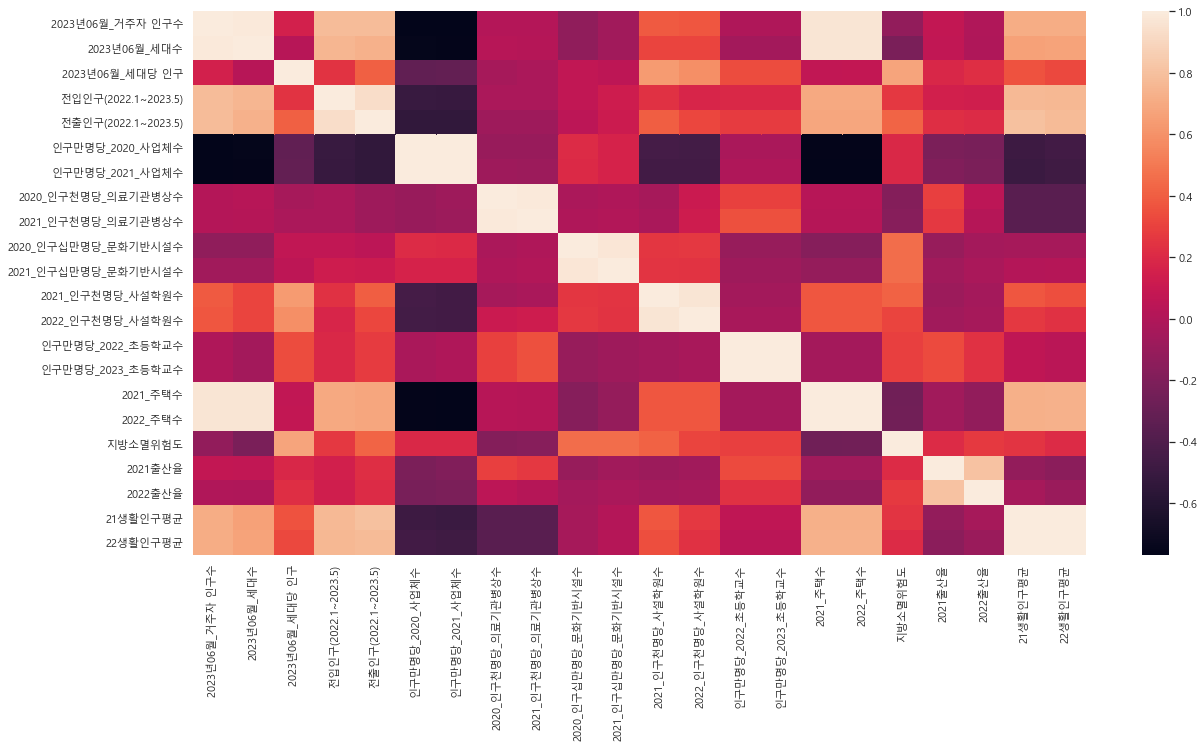

In [ ]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr())

plt.show()